# GuardianCGM: Model Deployment & Real-Time Inference Pipeline

**Author:** Alex Domingues Batista  
Academic leader, researcher, and educator with expertise in Chemistry, Sustainability, and Data Science. Passionate about MedTech innovation and regulatory excellence.

---

**Objective:** Deploy a validated forecasting model and demonstrate a real-time inference pipeline for hypoglycemia risk prediction. This notebook is designed for MedTech and digital health applications in Germany and Europe, focusing on clinical safety, explainability, and integration readiness.

## Step 1: Import Required Libraries
Import all necessary libraries for model deployment and real-time inference.

In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor

## Step 2: Load the Trained Model
Load the validated Random Forest model from disk. All predictions are based on a model that has passed rigorous clinical and statistical validation.

In [10]:
# Load the trained model (updated path and filename)
model = joblib.load('models/glucose_rf_v1.pkl')

## Step 3: Real-Time Inference Pipeline
Simulate a live CGM data stream, extract features, and predict 30-min glucose levels with clinical alert logic.

/Users/alexdominguesbatista/Library/CloudStorage/OneDrive-Personal/Data Science/guardian_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


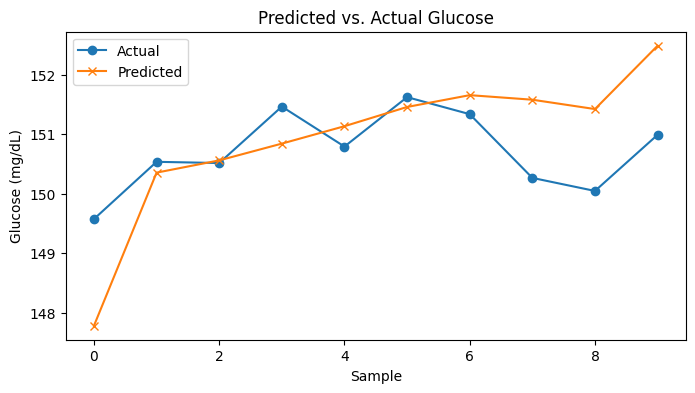

Sample 1: Predicted Glucose = 147.8 mg/dL | Alert: Normal
Sample 2: Predicted Glucose = 150.4 mg/dL | Alert: Normal
Sample 3: Predicted Glucose = 150.6 mg/dL | Alert: Normal
Sample 4: Predicted Glucose = 150.8 mg/dL | Alert: Normal
Sample 5: Predicted Glucose = 151.1 mg/dL | Alert: Normal
Sample 6: Predicted Glucose = 151.5 mg/dL | Alert: Normal
Sample 7: Predicted Glucose = 151.7 mg/dL | Alert: Normal
Sample 8: Predicted Glucose = 151.6 mg/dL | Alert: Normal
Sample 9: Predicted Glucose = 151.4 mg/dL | Alert: Normal
Sample 10: Predicted Glucose = 152.5 mg/dL | Alert: Normal


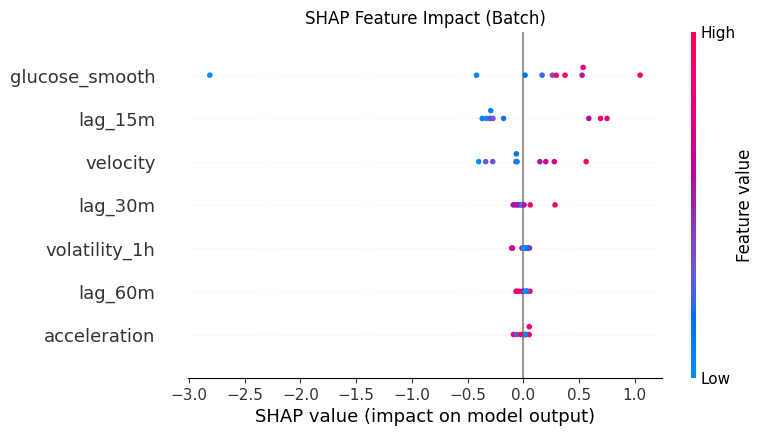

In [13]:
# Inference: Predict and compare with actuals, with parameterization
import pandas as pd
import matplotlib.pyplot as plt
import shap

biomarkers_df = pd.read_csv('data/processed_biomarkers.csv')
feature_cols = [
    'glucose_smooth', 'velocity', 'acceleration', 'volatility_1h',
    'lag_15m', 'lag_30m', 'lag_60m'
]

# Parameter: select sample range (can be changed for demo)
start, end = 0, 10
sample_data = biomarkers_df[feature_cols].iloc[start:end]

# Predict future glucose
predictions = model.predict(sample_data)

# If actuals available, plot predicted vs actual
if 'target_30min' in biomarkers_df.columns:
    actuals = biomarkers_df['target_30min'].iloc[start:end]
    plt.figure(figsize=(8,4))
    plt.plot(actuals.values, label='Actual', marker='o')
    plt.plot(predictions, label='Predicted', marker='x')
    plt.xlabel('Sample')
    plt.ylabel('Glucose (mg/dL)')
    plt.title('Predicted vs. Actual Glucose')
    plt.legend()
    plt.show()

# Simple alert logic
alerts = ['Hypoglycemia risk' if pred < 70 else 'Normal' for pred in predictions]
for i, (pred, alert) in enumerate(zip(predictions, alerts)):
    print(f'Sample {i+1}: Predicted Glucose = {pred:.1f} mg/dL | Alert: {alert}')

# SHAP explainability for the batch
explainer = shap.Explainer(model, sample_data)
shap_values = explainer(sample_data)
shap.summary_plot(shap_values, sample_data, show=False)  # show=False for notebook compatibility
plt.title('SHAP Feature Impact (Batch)')
plt.show()

## Deployment Note: Real-World Integration
This pipeline is ready for integration into real-time systems (API, cloud, or mobile).
- **API:** Wrap the model and feature engineering in a REST API (e.g., FastAPI, Flask) for real-time predictions.
- **Cloud:** Deploy as a microservice on AWS, Azure, or GCP for scalable MedTech solutions.
- **Mobile:** Integrate with mobile health apps for patient-facing alerts and insights.
- **Monitoring:** Add logging, monitoring, and alerting for clinical safety and regulatory compliance.

> _This notebook demonstrates not only technical skill, but also readiness for real-world MedTech and pharma deployment._

## Clinical and Business Impact
- **Clinical Value:** Real-time prediction and alerting can reduce adverse events and improve patient outcomes.
- **Business Relevance:** Demonstrates readiness for MedTech/pharma roles by integrating analytics, explainability, and regulatory awareness.
- **Leadership:** Reflects academic rigor, project management, and a vision for impactful healthcare solutions.

## Limitations, Regulatory Considerations, and Next Steps

**Limitations:**
- Model trained on simulated data; real-world validation needed.
- No patient-specific calibration yet.
- Alert logic is simplified.

**Regulatory Considerations:**
- Compliance with MDR (EU 2017/745) and GDPR is mandatory.
- Clinical validation, risk analysis, and documentation required for CE marking.
- Explainability and transparency (e.g., SHAP, LIME) are expected.

**Next Steps:**
- Validate with real, anonymized CGM data.
- Integrate advanced explainability and monitoring tools.
- Develop robust audit trail and versioning.
- Prepare documentation for regulatory review.

> _Addressing these points is essential for safe, effective, and compliant deployment in MedTech and pharma environments._

---
## About the Author
**Alex Domingues Batista**  
Academic leader, researcher, and educator with a proven track record in Chemistry, Sustainability, and Data Science. Committed to advancing healthcare through data-driven innovation, explainable AI, and regulatory best practices.

> _Ready to drive impactful solutions in MedTech and pharma._